# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [11]:
print(cities)

['port elizabeth', 'khatanga', 'busselton', 'mys shmidta', 'illoqqortoormiut', 'georgetown', 'upernavik', 'vaini', 'ancud', 'new norfolk', 'lavrentiya', 'oum hadjer', 'tumannyy', 'kapaa', 'tabas', 'touros', 'taolanaro', 'thompson', 'nieves', 'avarua', 'asau', 'lasa', 'lorengau', 'punta arenas', 'garowe', 'paciran', 'chiang klang', 'rikitea', 'karditsa', 'bandarbeyla', 'fort-shevchenko', 'cape town', 'butaritari', 'victoria', 'dikson', 'hobart', 'mataura', 'einsiedeln', 'tuktoyaktuk', 'belmonte', 'alice springs', 'santo tomas', 'esperance', 'longyearbyen', 'saldanha', 'shimoda', 'mayo', 'amderma', 'kirkwall', 'inderborskiy', 'hermanus', 'east london', 'cherskiy', 'jamestown', 'klaksvik', 'provideniya', 'port keats', 'kousseri', 'ambilobe', 'soligalich', 'ust-kamchatsk', 'kodiak', 'biak', 'albany', 'santiago del estero', 'chokurdakh', 'mar del plata', 'port macquarie', 'sarakhs', 'port alfred', 'kirensk', 'padang', 'hartland', 'puerto ayora', 'bereznik', 'ushuaia', 'dingle', 'bengkulu', 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [12]:
from api_keys import api_key


In [25]:
city_weather = {'city':[],
                'lon':[],
                'lat':[],
                'country':[],
                'max temp':[],
                'pressure':[],
               'humidity':[],
               'wind speed':[],
               'cloudiness':[],
               'date_in':[]}

counter=1

#loop over cities and add data to dictionary
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    try:
        #q represents a city
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json()
        
        #list the counter and city name being looked up
        print(counter, "looking for weather for city", city)
        
                
        #validate fields exist
        try:
            city_weather['lon'].append(data['coord']['lon'])
            city_weather['lat'].append(data['coord']['lat'])
            city_weather['country'].append(data['sys']['country'])
            city_weather['max temp'].append(data['main']['temp_max'])
            city_weather['pressure'].append(data['main']['pressure'])
            city_weather['humidity'].append(data['main']['humidity'])
            city_weather['wind speed'].append(data['wind']['speed'])
            city_weather['city'].append(data['name'])
            try:
                city_weather['date_in'].append(data['dt'])
        
            except:
                city_weather['date_in'].append(np.nan)
                
            try:
                city_weather['cloudiness'].append(data['clouds']['all'])
        
            except:
                city_weather['cloudiness'].append(np.nan)
            
            
        except:
            print('missing data')
            pass
        
        
        counter+=1
    
    except:
        #print(city+ " not found")
        pass


1 looking for weather for city port elizabeth
2 looking for weather for city khatanga
3 looking for weather for city busselton
4 looking for weather for city mys shmidta
missing data
5 looking for weather for city illoqqortoormiut
missing data
6 looking for weather for city georgetown
7 looking for weather for city upernavik
8 looking for weather for city vaini
9 looking for weather for city ancud
10 looking for weather for city new norfolk
11 looking for weather for city lavrentiya
12 looking for weather for city oum hadjer
13 looking for weather for city tumannyy
missing data
14 looking for weather for city kapaa
15 looking for weather for city tabas
16 looking for weather for city touros
17 looking for weather for city taolanaro
missing data
18 looking for weather for city thompson
19 looking for weather for city nieves
20 looking for weather for city avarua
21 looking for weather for city asau
22 looking for weather for city lasa
23 looking for weather for city lorengau
24 looking 

192 looking for weather for city varhaug
193 looking for weather for city salym
194 looking for weather for city belushya guba
missing data
195 looking for weather for city severo-kurilsk
196 looking for weather for city ponta do sol
197 looking for weather for city luderitz
198 looking for weather for city sao joao da barra
199 looking for weather for city port hardy
200 looking for weather for city morgan city
201 looking for weather for city lompoc
202 looking for weather for city vardo
203 looking for weather for city anadyr
204 looking for weather for city san patricio
205 looking for weather for city sitka
206 looking for weather for city mount darwin
207 looking for weather for city vagur
208 looking for weather for city zapolyarnyy
209 looking for weather for city weymouth
210 looking for weather for city saint anthony
211 looking for weather for city kaohsiung
212 looking for weather for city kagalnitskaya
213 looking for weather for city karimganj
214 looking for weather for 

381 looking for weather for city sengiley
382 looking for weather for city mentok
missing data
383 looking for weather for city arraial do cabo
384 looking for weather for city chumikan
385 looking for weather for city narsaq
386 looking for weather for city salalah
387 looking for weather for city mehamn
388 looking for weather for city acapulco
389 looking for weather for city keti bandar
390 looking for weather for city mahebourg
391 looking for weather for city blonduos
missing data
392 looking for weather for city qaqortoq
393 looking for weather for city misratah
394 looking for weather for city bestobe
395 looking for weather for city leshukonskoye
396 looking for weather for city nioro
397 looking for weather for city grindavik
398 looking for weather for city chifeng
399 looking for weather for city borculo
400 looking for weather for city rasskazovo
401 looking for weather for city gat
402 looking for weather for city along
403 looking for weather for city boa vista
404 looki

571 looking for weather for city tigil
572 looking for weather for city matsanga
missing data
573 looking for weather for city fort nelson
574 looking for weather for city kavieng
575 looking for weather for city ust-maya
576 looking for weather for city gazli
577 looking for weather for city butia
578 looking for weather for city moerai
579 looking for weather for city marcona
missing data
580 looking for weather for city sokur
581 looking for weather for city turkistan
582 looking for weather for city viligili
missing data
583 looking for weather for city sinkat
missing data
584 looking for weather for city geraldton
585 looking for weather for city siddharthanagar
586 looking for weather for city huanren
587 looking for weather for city bilibino
588 looking for weather for city dukat
589 looking for weather for city san blas
590 looking for weather for city daru
591 looking for weather for city challapata
592 looking for weather for city tyrma
593 looking for weather for city axim
5

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [26]:
weather_df = pd.DataFrame.from_dict(city_weather)
weather_df.to_csv("city_weather_data.csv")
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        573 non-null    object 
 1   lon         573 non-null    float64
 2   lat         573 non-null    float64
 3   country     573 non-null    object 
 4   max temp    573 non-null    float64
 5   pressure    573 non-null    int64  
 6   humidity    573 non-null    int64  
 7   wind speed  573 non-null    float64
 8   cloudiness  573 non-null    int64  
 9   date_in     573 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.9+ KB


In [27]:
weather_df.head()

,city,lon,lat,country,max temp,pressure,humidity,wind speed,cloudiness,date_in
0,Port Elizabeth,25.5701,-33.9180,ZA,65.10,1024,77,11.50,20,1634661545
1,Khatanga,102.5000,71.9667,RU,29.37,998,93,14.61,100,1634661825
2,Busselton,115.3333,-33.6500,AU,55.04,1003,73,25.88,100,1634661825
3,George Town,100.3354,5.4112,MY,78.75,1014,93,5.01,40,1634661826
4,Upernavik,-56.1549,72.7868,GL,34.50,1018,66,14.72,100,1634661826


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

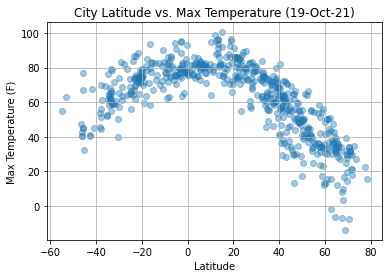

In [39]:
import datetime
  
Current_Date_Formatted = datetime.datetime.today().strftime ('%d-%b-%y')

df = pd.read_csv("city_weather_data.csv")

fig, ax = plt.subplots()
ax.scatter(x="lat", y="max temp", data=df, alpha = 0.4)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (" + str(Current_Date_Formatted) + ")")
ax.grid(True)

plt.savefig("Lat_Temp_plot", format="png")
plt.show()

#### Latitude vs. Humidity Plot

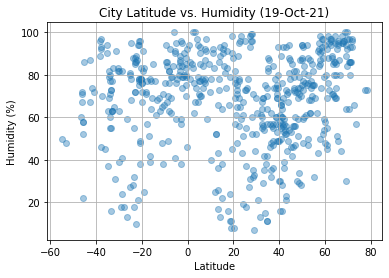

In [38]:
import datetime
  
Current_Date_Formatted = datetime.datetime.today().strftime ('%d-%b-%y')

df = pd.read_csv("city_weather_data.csv")

fig, ax = plt.subplots()
ax.scatter(x="lat", y="humidity", data=df,
               alpha=0.4)

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (" + str(Current_Date_Formatted) + ")")
ax.grid(True)

plt.savefig("Lat_Hum_plot", format="png")
plt.show()

#### Latitude vs. Cloudiness Plot

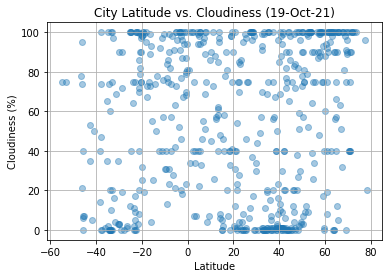

In [37]:
fig, ax = plt.subplots()
ax.scatter(x="lat", y="cloudiness", data=df, alpha=0.4)

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (" + str(Current_Date_Formatted) + ")")
ax.grid(True)

plt.savefig("Lat_Cloud_plot", format="png")
plt.show()

#### Latitude vs. Wind Speed Plot

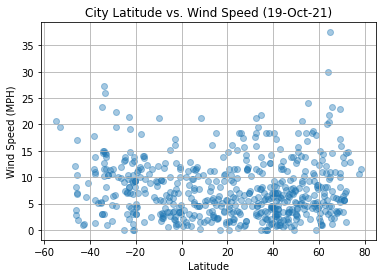

In [40]:
fig, ax = plt.subplots()
ax.scatter(x="lat", y="wind speed", data=df, alpha=0.4)

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (MPH)")
ax.set_title("City Latitude vs. Wind Speed (" + str(Current_Date_Formatted) + ")")
ax.grid(True)

plt.savefig("Lat_Wind_plot", format="png")
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

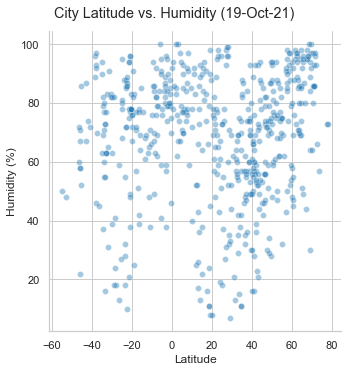

In [57]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

g=sns.relplot(x="lat",y="humidity",data=df,alpha=0.4)

g.set(xlabel= "Latitude", ylabel = "Humidity (%)")
g.fig.suptitle("City Latitude vs. Humidity (" + str(Current_Date_Formatted) + ")", y=1.03)

plt.savefig("Lat_Hum_plot_sns", format="png",bbox_inches = 'tight')
plt.show()


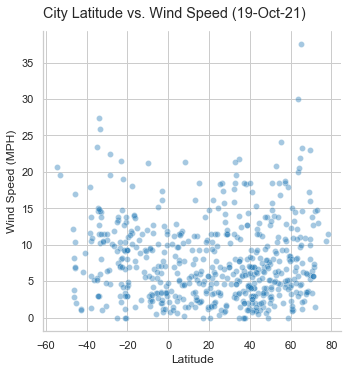

In [58]:
sns.set_context("notebook")

g=sns.relplot(x="lat",y="wind speed",data=df,alpha=0.4)

g.set(xlabel= "Latitude", ylabel = "Wind Speed (MPH)")
g.fig.suptitle("City Latitude vs. Wind Speed (" + str(Current_Date_Formatted) + ")", y=1.03)

plt.savefig("Lat_Wind_plot_sns", format="png",bbox_inches = 'tight')
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

3 observable trends
- Max temperature is highest -20 to 20 degrees latitude
- Cloudiness is pretty dispersed across all latitudes - latitude does not seem to affect it
- Humidity is higher between 60 - 70 degrees latitude

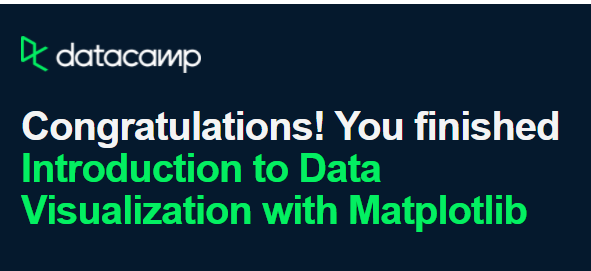


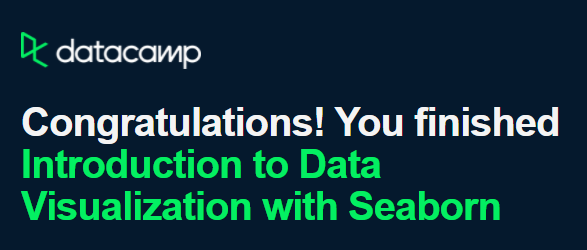

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [118]:
#for city in cities:
#    base_url = "http://api.openweathermap.org/data/2.5/forecast/hourly?&APPID=" + api_key
#    
#    try:
#        #q represents a city
#        req = requests.get(base_url + f'&q={city}')
import requests
from api_keys1 import api_key


base_url = "http://api.openweathermap.org/data/2.5/forecast/daily?q=London&units=metric&cnt=7&appid=" + api_key    

#pro.openweathermap.org/data/2.5/forecast/hourly?id=524901&appid={API key}
#api.openweathermap.org/data/2.5/forecast/daily?q=London&units=metric&cnt=7&appid={API key}
#q represents a city
#req = requests.get(base_url + f'&q={city}')
         
req = requests.get(base_url)
#create a json output of the data
json_data = req.json()
print(json_data)



{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}
